In [ ]:
import psycopg2
import pandas.io.sql as sqlio
import re
import pandas as pd

In [ ]:
connection = psycopg2.connect(user="de8_bhpa29",
                                  password="LOdcz31-",
                                  host="data-sandbox.c1tykfvfhpit.eu-west-2.rds.amazonaws.com",
                                  port="5432",
                                  database="pagila")
cursor = connection.cursor()

In [ ]:
data = sqlio.read_sql_query('SELECT * FROM student.bp_electricity', connection)

<ipython-input-3-2a85ca8bb2af>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = sqlio.read_sql_query('SELECT * FROM student.bp_electricity', connection)


## Data Exploration

In [ ]:
data.head()

,id,system_demand_latest_in_mw,forecast_peak_today_in_mw,max_system_demand_all_time_in_mw,latest_system_generation_in_mw,thermal_generation_coal_gas_other_percentage,renewable_generation_in_percentage,net_import,latest_net_interconnection,latest_ewic,latest_moyle,latest_co2_emissions,time_stamp
0,1,"4,231 MW","4,419 MW","7,031 MW","4,234 MW",25.93 %,73.91 %,0.16,22.0,34.0,-12.0,718 tCO/hr,2023-08-19 13:45:46.296821+00:00
1,2,"4,214 MW","4,419 MW","7,031 MW","4,240 MW",26.07 %,74.42 %,-0.49,-9.0,76.0,-85.0,718 tCO/hr,2023-08-19 14:00:44.403883+00:00
2,3,"4,192 MW","4,419 MW","7,031 MW","4,376 MW",27.56 %,76.44 %,-4.0,-158.0,1.0,-159.0,732 tCO/hr,2023-08-19 14:15:44.501010+00:00
3,4,"4,214 MW","4,419 MW","7,031 MW","4,541 MW",27.7 %,79.88 %,-7.58,-309.0,-74.0,-235.0,733 tCO/hr,2023-08-19 14:30:44.556201+00:00
4,5,"4,217 MW","4,408 MW","7,031 MW","4,583 MW",26.59 %,81.91 %,-8.5,-348.0,-36.0,-312.0,723 tCO/hr,2023-08-19 14:45:44.605164+00:00


In [ ]:
data.shape

(3144, 13)

In [ ]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3139    False
3140    False
3141    False
3142    False
3143    False
Length: 3144, dtype: bool

In [ ]:
data.corr()

<ipython-input-7-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id
id,1.0


In [ ]:
data.drop(['id'], axis =1, inplace=True)

In [ ]:
data.dtypes

system_demand_latest_in_mw                                   object
forecast_peak_today_in_mw                                    object
max_system_demand_all_time_in_mw                             object
latest_system_generation_in_mw                               object
thermal_generation_coal_gas_other_percentage                 object
renewable_generation_in_percentage                           object
net_import                                                   object
latest_net_interconnection                                   object
latest_ewic                                                  object
latest_moyle                                                 object
latest_co2_emissions                                         object
time_stamp                                      datetime64[ns, UTC]
dtype: object

##Data Cleaning Code

In [ ]:
#Function to clean the code
def new_clean(s):
  if (s != None):
    if isinstance(s, float):
      return s
    elif s == 'tCO2/hr' or s== 'tCO/hr':
      return None
    else:
      if ',' in s:
        s = s.replace(',','')
      rex = re.compile(r'[0-9]{3,}|[0-9]{2,}[\.]?[0-9]{0,}|[\-]?[0-9]{0,}[\.]?[0-9]{0,}')
      print(rex.findall(s)[0])
      return float(rex.findall(s)[0])
  else:
    pass

In [ ]:
#Using the above made function
for m in data.columns:
  data[m] = data[m].map(new_clean)
  if m == 'latest_co2_emissions':
    break

Streaming output truncated to the last 5000 lines.
442
442
442
442
415
342
279
223
291
365
398
324
250
297
371
327
324
357
318
282
277
264
266
285
211
257
405
356
282
332
385
311
237
291
365
396
404
405
441
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
441
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
413
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
382
327
270
254
180
105
106
183
257
276
288
362
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
441
442
442
442
442
442
442
442
442
442
441
442
442
442
441
442
442
442
441
394
401
442
442
369
390
383
441
442
442
442
369
296
366
440
442
369
432
442
442
361
372
372
372
372
372
372
372
372
372
372
372
372
372
305
234
162
86
11
-3
-78
-152
-228
-243
-167
-92
-17
-4
70
147
296
441
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
442
411
341
267
194
259
333
40

In [ ]:
#Checking the data type after perfomring the cleaning operations
data.dtypes

system_demand_latest_in_mw                                  float64
forecast_peak_today_in_mw                                   float64
max_system_demand_all_time_in_mw                            float64
latest_system_generation_in_mw                              float64
thermal_generation_coal_gas_other_percentage                float64
renewable_generation_in_percentage                          float64
net_import                                                  float64
latest_net_interconnection                                  float64
latest_ewic                                                 float64
latest_moyle                                                float64
latest_co2_emissions                                        float64
time_stamp                                      datetime64[ns, UTC]
dtype: object

In [ ]:
# Checking for the missing values
data.isnull().sum()

system_demand_latest_in_mw                        6
forecast_peak_today_in_mw                         0
max_system_demand_all_time_in_mw                  0
latest_system_generation_in_mw                    3
thermal_generation_coal_gas_other_percentage      3
renewable_generation_in_percentage                3
net_import                                        3
latest_net_interconnection                        3
latest_ewic                                       3
latest_moyle                                      3
latest_co2_emissions                            100
time_stamp                                        0
dtype: int64

In [ ]:
data['thermal_generation_coal_gas_other_percentage'].fillna(method='ffill', inplace=True)

In [ ]:
data.isnull().sum()

system_demand_latest_in_mw                        6
forecast_peak_today_in_mw                         0
max_system_demand_all_time_in_mw                  0
latest_system_generation_in_mw                    3
thermal_generation_coal_gas_other_percentage      0
renewable_generation_in_percentage                3
net_import                                        3
latest_net_interconnection                        3
latest_ewic                                       3
latest_moyle                                      3
latest_co2_emissions                            100
time_stamp                                        0
dtype: int64

###Creating a Linear Regressor for doing imputation in the missing values of CO2 Emission column


In [ ]:
sample  = data[['thermal_generation_coal_gas_other_percentage','latest_co2_emissions']]

In [ ]:
sample.dropna(inplace=True)

<ipython-input-17-0cdb2cddf5ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample.dropna(inplace=True)


In [ ]:
import numpy as np
x = sample['thermal_generation_coal_gas_other_percentage']
y = sample['latest_co2_emissions']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
import numpy as np
x_train = x_train.values.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
predictions = model.predict(x_test.values.reshape(-1,1))

In [ ]:
import sklearn
sklearn.metrics.r2_score(y_test, predictions)

0.7610542209816844

In [ ]:
rmse(predictions,y_test)

149.47032559042944

In [ ]:
final=[]
for i,row in data.iterrows():
  x = row['thermal_generation_coal_gas_other_percentage']
  if pd.isna(x):
    y=np.nan
  else:
    y = model.predict(np.array([[x]]))[0]

  act = row['latest_co2_emissions']

  if pd.isna(act):

    final.append(y)

  else:
    final.append(act)

In [ ]:
data['latest_co2_emissions_imputed']=final

In [ ]:
data.drop(['latest_co2_emissions'],axis=1,inplace=True)

In [ ]:
data.fillna(method='ffill', inplace=True)

In [ ]:
data.isnull().sum()

system_demand_latest_in_mw                      0
forecast_peak_today_in_mw                       0
max_system_demand_all_time_in_mw                0
latest_system_generation_in_mw                  0
thermal_generation_coal_gas_other_percentage    0
renewable_generation_in_percentage              0
net_import                                      0
latest_net_interconnection                      0
latest_ewic                                     0
latest_moyle                                    0
time_stamp                                      0
latest_co2_emissions_imputed                    0
dtype: int64

In [ ]:
# Rearranging the columns order
data= data.iloc[:, [10,0,1,2,3,4,5,6,7,8,9,11]]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##Visualisations

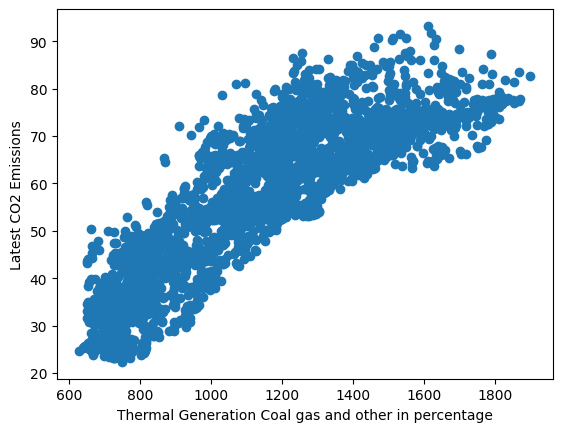

In [ ]:
plt.scatter(data['latest_co2_emissions_imputed'], data['thermal_generation_coal_gas_other_percentage'])
plt.xlabel('Thermal Generation Coal gas and other in percentage')
plt.ylabel('Latest CO2 Emissions')
plt.show()

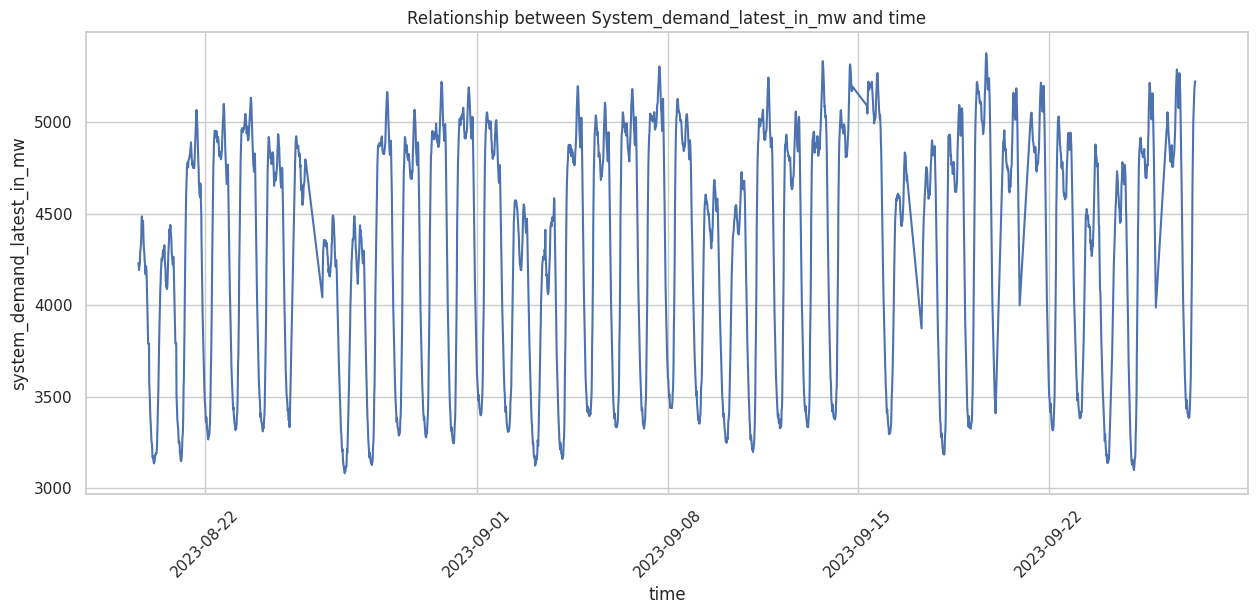

In [ ]:
sns.set(style="whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(15, 6))  # Set the figure size
sns.lineplot(x='time_stamp', y='system_demand_latest_in_mw', data=data)

# Set labels and title
plt.xlabel('time')
plt.ylabel('system_demand_latest_in_mw')
plt.title('Relationship between System_demand_latest_in_mw and time')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

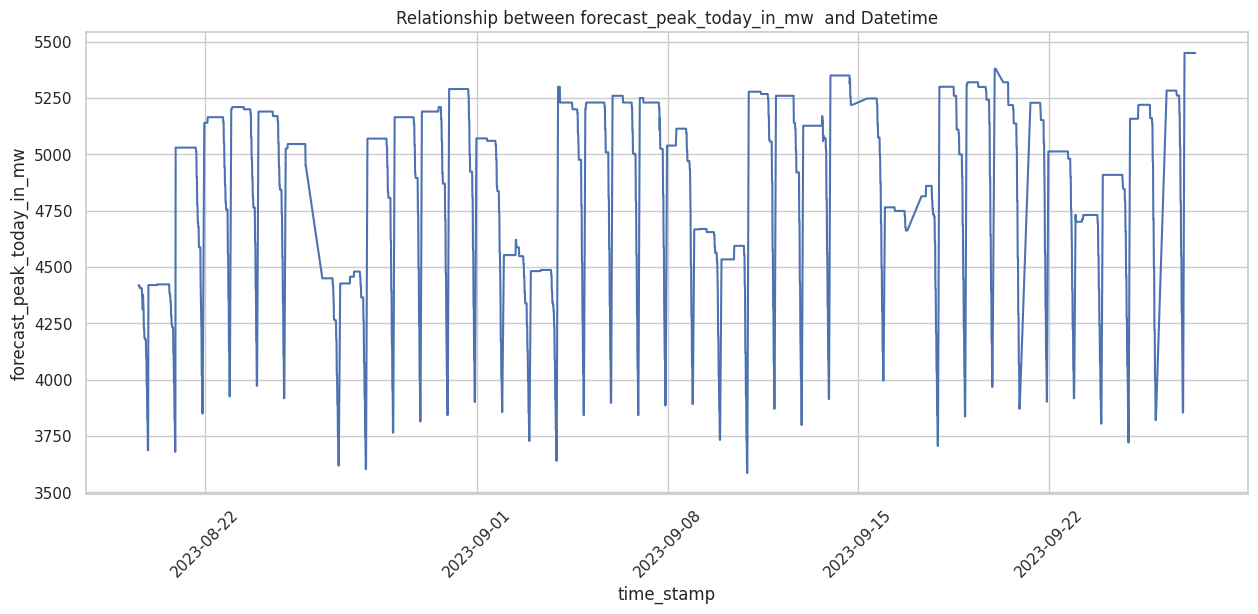

In [ ]:
sns.set(style="whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(15, 6))  # Set the figure size
sns.lineplot(x='time_stamp', y='forecast_peak_today_in_mw', data=data)

# Set labels and title
plt.xlabel('time_stamp')
plt.ylabel('forecast_peak_today_in_mw')
plt.title('Relationship between forecast_peak_today_in_mw  and Datetime')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

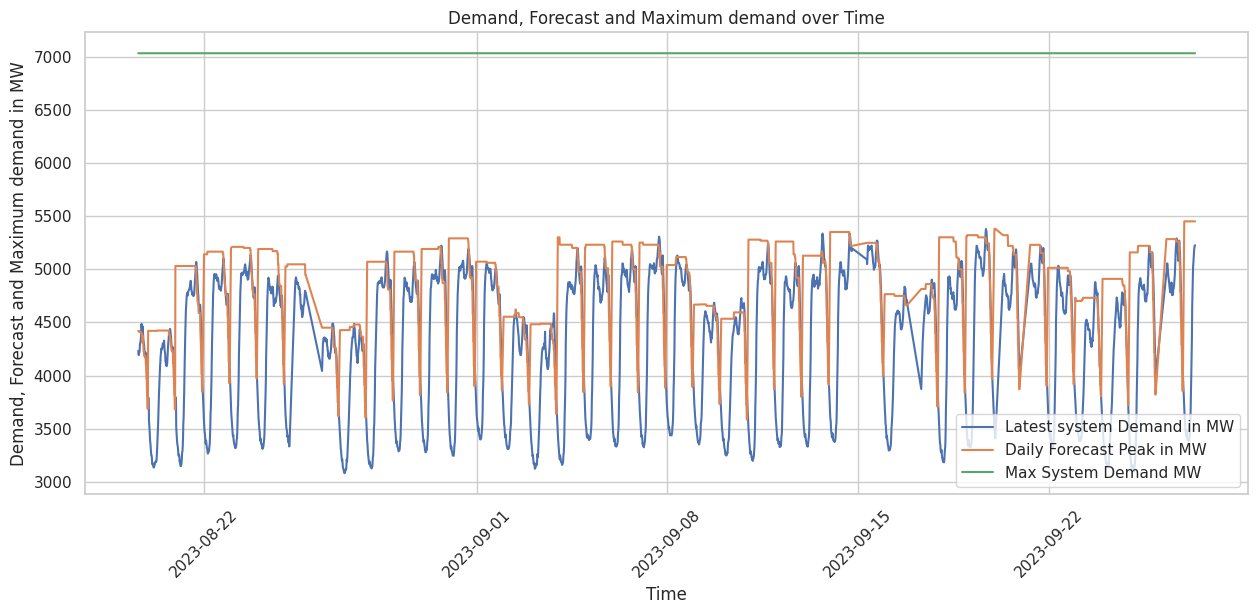

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='time_stamp', y='system_demand_latest_in_mw', data=data, label='Latest system Demand in MW')
sns.lineplot(x='time_stamp', y='forecast_peak_today_in_mw', data=data, label='Daily Forecast Peak in MW')
sns.lineplot(x='time_stamp', y='max_system_demand_all_time_in_mw', data=data, label='Max System Demand MW')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Demand, Forecast and Maximum demand in MW')
plt.title('Demand, Forecast and Maximum demand over Time')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
data['deficit_in_generation'] = data['system_demand_latest_in_mw'] - data['latest_system_generation_in_mw']

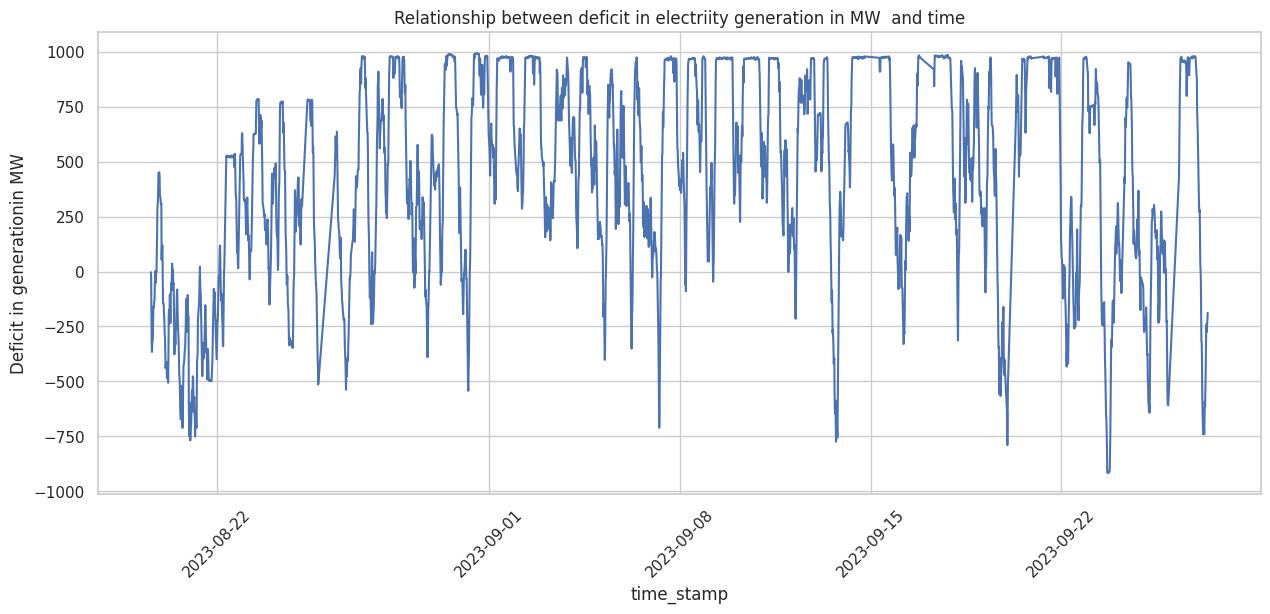

In [ ]:
sns.set(style="whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(15, 6))  # Set the figure size
sns.lineplot(x='time_stamp', y='deficit_in_generation', data=data)

# Set labels and title
plt.xlabel('time_stamp')
plt.ylabel('Deficit in generationin MW')
plt.title('Relationship between deficit in electriity generation in MW  and time')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

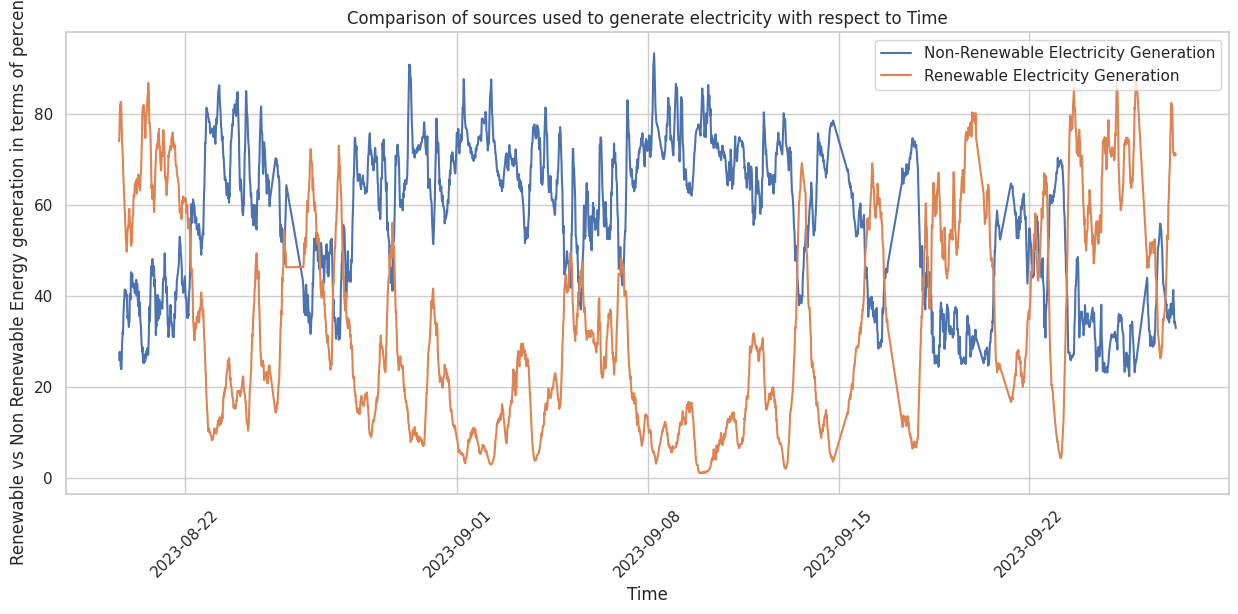

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='time_stamp', y='thermal_generation_coal_gas_other_percentage', data=data, label='Non-Renewable Electricity Generation')
sns.lineplot(x='time_stamp', y='renewable_generation_in_percentage', data=data, label='Renewable Electricity Generation')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Renewable vs Non Renewable Energy generation in terms of percentage')
plt.title('Comparison of sources used to generate electricity with respect to Time')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
data.to_csv("clean_data.csv",index=False)